In [1]:
%matplotlib inline
import lightkurve as lk
from lightkurve_ext import download_lightcurvefiles
import tic_plot as tplt

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplotlib

import pandas as pd
import astropy as astropy
from astropy.io import fits

In [2]:
# Possible Candidates, not a TOI yet
# the dips look a tad V-shape though.
tic = 232612416

# Load the light_curves into collection
lcf_coll = download_lightcurvefiles(f"TIC{tic}", mission='TESS', download_dir='./data')
print(len(lcf_coll))


2


In [3]:
# search_res = lk.search.search_lightcurvefile(f"TIC{tic}", mission='TESS')
# search_res.table
#
# entry = search_res.table[0]
# entry['obs_collection'] +  '/' + entry['obs_id'] + '/' + entry['productFilename']
# list(map(lambda e: e['obs_collection'] +  '/' + e['obs_id'] + '/' + e['productFilename']
#          , search_res.table))


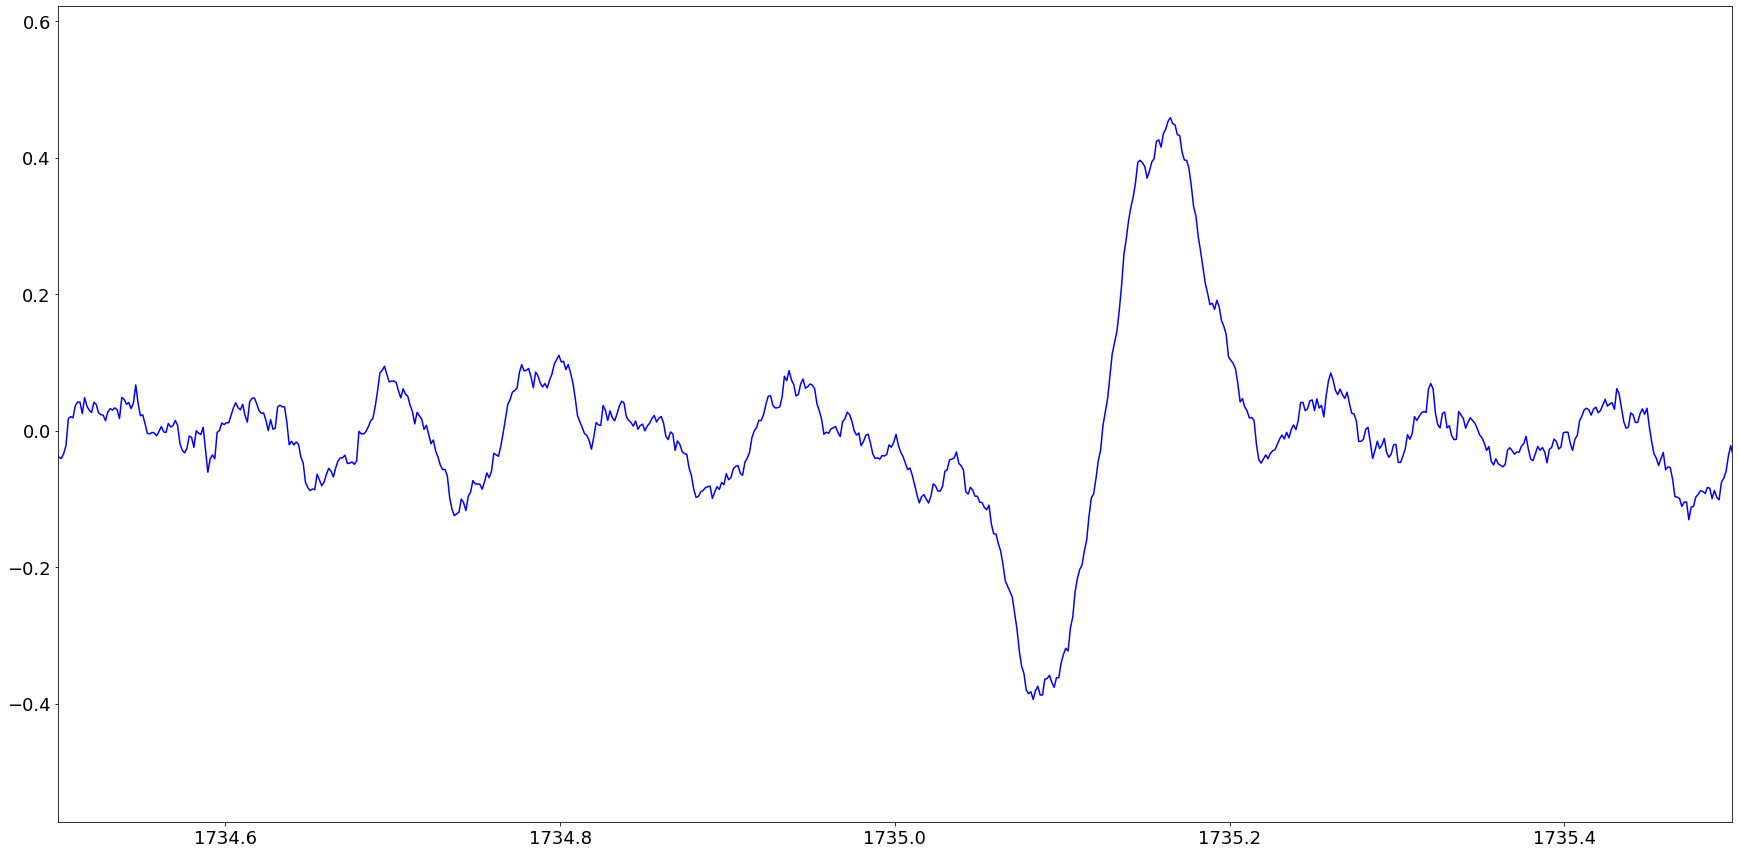

In [8]:
if False: 
    fig = plt.figure(figsize=(30,15))
    tplt.plot_lcf_flux_delta(tplt.lcf_of_sector(lcf_coll, 15), fig.gca()
                     , xmin=1734.5, xmax=1735.5
                       )


Sectors: [14, 15]


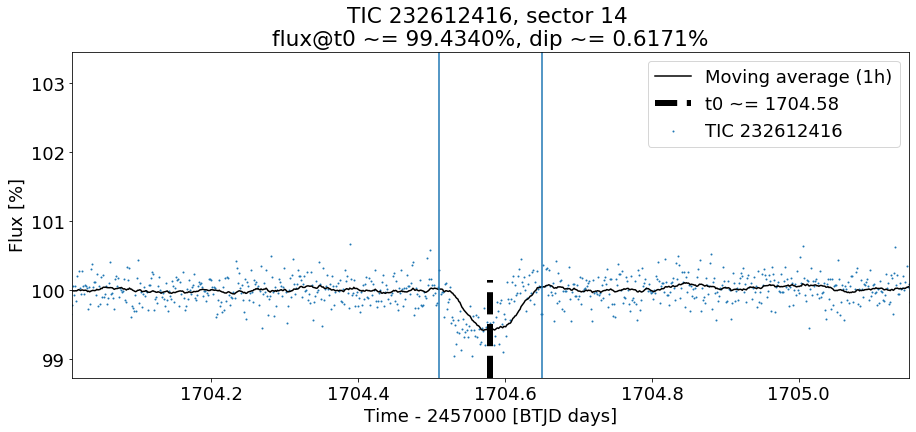

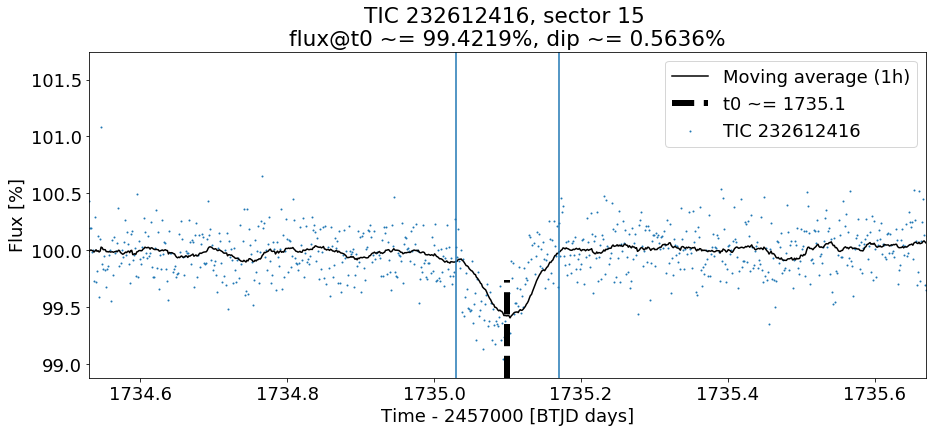

In [5]:
def plot_selected(lcf_coll):                      
    matplotlib.rcParams.update({'font.size':18}) 
    matplotlib.rcParams.update({'font.family':'sans-serif'})
    tplt.plot_n_annotate_lcf(tplt.lcf_of_sector(lcf_coll, 14), ax=tplt.lcf_fig().gca()
                        , t0=1704.58, t_start=1704.51, t_end=1704.65
                       )
    tplt.plot_n_annotate_lcf(tplt.lcf_of_sector(lcf_coll, 15), ax=tplt.lcf_fig().gca()
                        , t0=1735.10, t_start=1735.03, t_end=1735.17
                       )
#     print(f"Period ~= {as_4decimal(1622.5 - 1538.6)} days")
    return 

                     
# tplt.plot_all(lcf_coll)

plot_selected(lcf_coll)

print("Sectors: " + str(list(map(lambda lcf: lcf.get_header()['SECTOR'], lcf_coll))))


In [6]:
print(list(map(lambda lc: lc.get_header()['SECTOR'], lcf_coll)))
print(list(map(lambda lc: lc.get_header()['CAMERA'], lcf_coll)))
print(list(map(lambda lc: lc.get_header()['DATE-OBS'], lcf_coll)))


[14, 15]
[3, 3]
['2019-07-18T20:19:29.942Z', '2019-08-15T20:35:28.889Z']


In [7]:
# combine all the observations together
# or I can just use lcf_coll.stich()
lc = None
for i in range(0, len(lcf_coll)):
    lc_cur = lcf_coll[i].get_lightcurve('PDCSAP_FLUX')
    if lc == None:
        lc = lc_cur    
    else:
        lc.append(lc_cur, inplace=True)
    
print(len(lc.time))

for i in range(0, len(lcf_coll)):
    lc_cur = lcf_coll[i].get_lightcurve('PDCSAP_FLUX')
    print(f"  Sector {lcf_coll[i].get_header()['SECTOR']}: {lc_cur.time.min()} - {lc_cur.time.max()}")

print(lc.time.max()  - lc.time.min())

# use the interactive transit period detection
#   caveat: un-sure if combining observations over time make sense for the algorithm
lc.interact_bls()


36370
  Sector 14: 1683.3539902856278 - 1710.203717809407
  Sector 15: 1711.3648177619948 - 1737.4090389734008
54.055048687773024
